In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
%matplotlib inline
print(tf.__version__)
tf.logging.set_verbosity(tf.logging.INFO)

1.12.0


In [3]:
df = pd.read_csv("https://storage.googleapis.com/ml_universities/california_housing_train.csv", sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


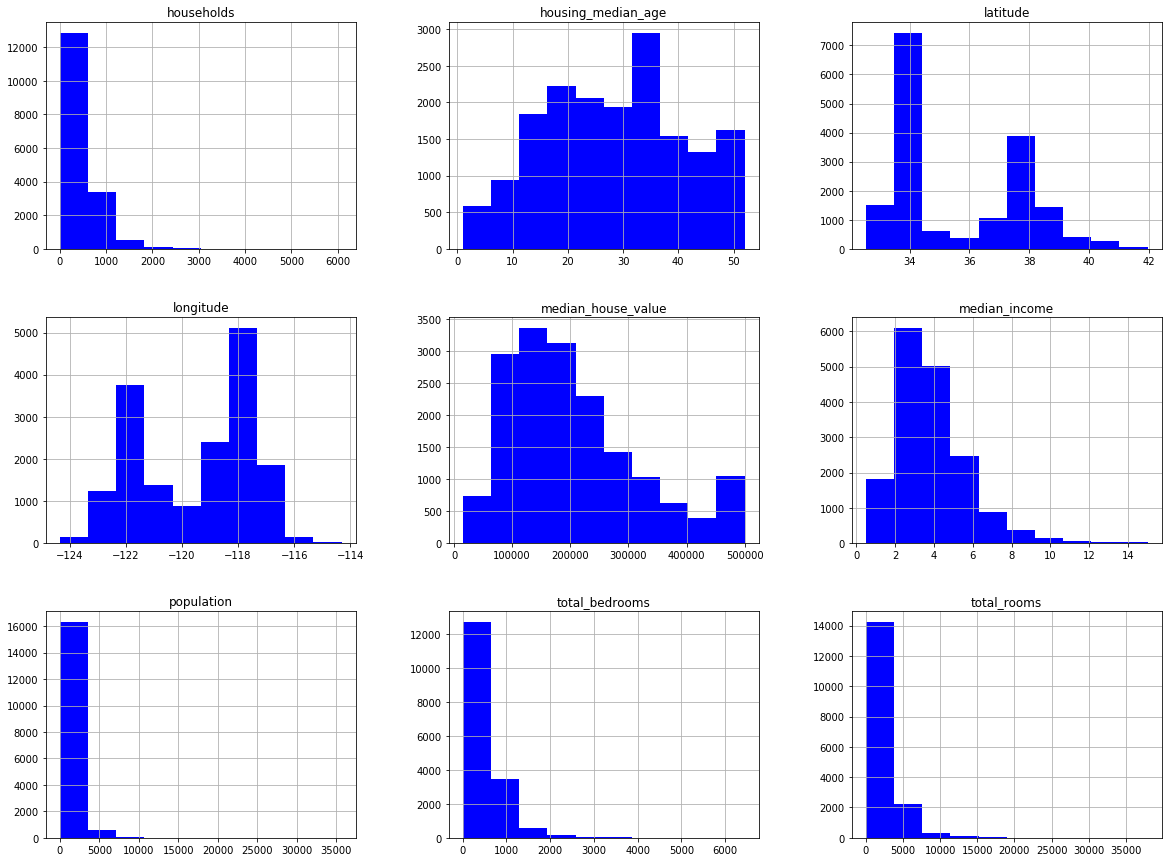

In [6]:
df.hist(figsize=(20,15), color='blue')
plt.show()
## Median income is in some metrics (Not sure)
## Total bedrooms and total rooms looks too high. It may be the no of bedrooms in a zip code or something
## Lat and log makes sense. It may be mostly around the 2 major cities in CA - LA and SFO
## Median household value is a high value. Divide this by 100000 for better performance

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


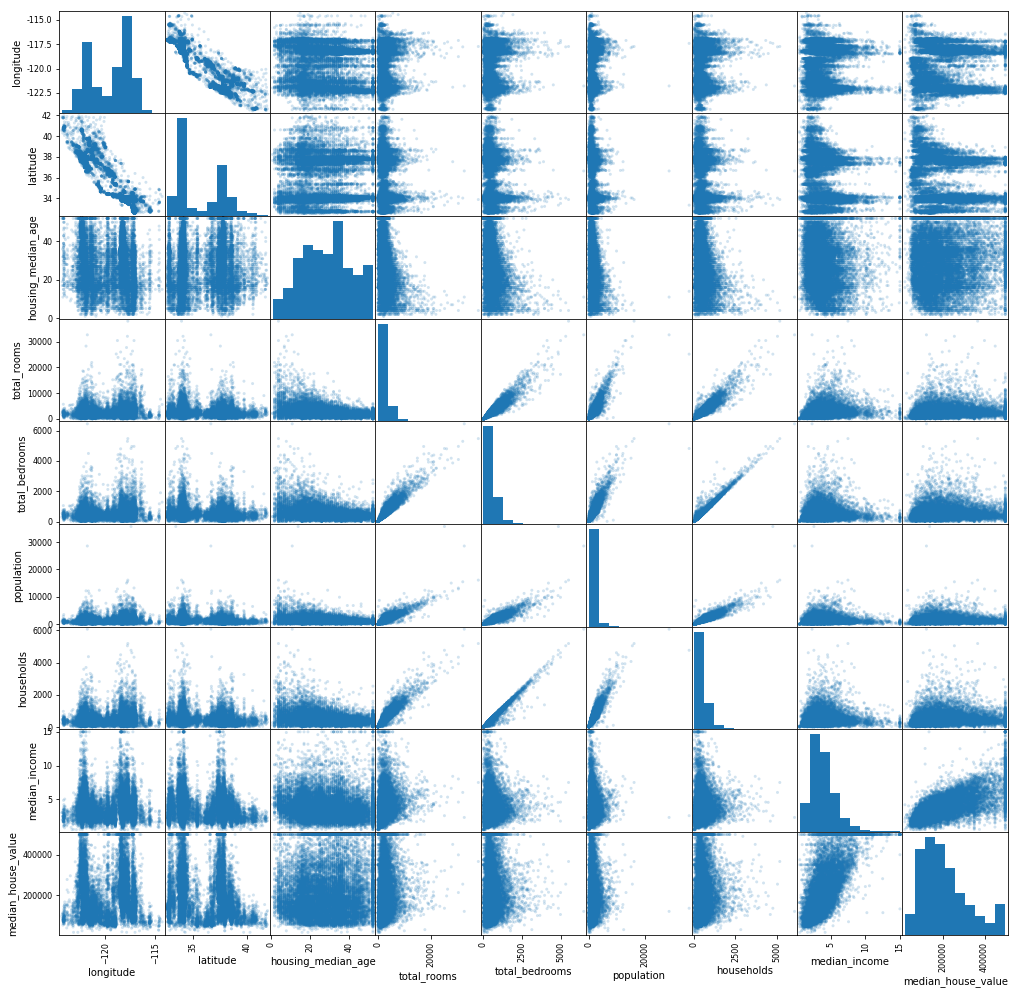

In [12]:
sc_plt = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(17, 17), diagonal='hist')
sc_plt;

In [35]:
df['num_rooms'] = df['total_rooms'] / df['households']
df['num_bedrooms'] = df['total_bedrooms'] / df['households']
df['persons_per_house'] = df['population'] / df['households']
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,num_rooms,num_bedrooms,persons_per_house
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353,5.439044,1.097281,2.976337
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387,2.539196,0.489057,4.037838
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000,4.445275,1.006166,2.432609
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000,5.236106,1.048780,2.816872
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000,6.058097,1.100000,3.279435
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,502.461538


In [36]:
df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis = 1, inplace = True)
df.describe()

,longitude,latitude,housing_median_age,median_income,median_house_value,num_rooms,num_bedrooms,persons_per_house
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,3.883578,207300.912353,5.439044,1.097281,2.976337
std,2.005166,2.137340,12.586937,1.908157,115983.764387,2.539196,0.489057,4.037838
min,-124.350000,32.540000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,-121.790000,33.930000,18.000000,2.566375,119400.000000,4.445275,1.006166,2.432609
50%,-118.490000,34.250000,29.000000,3.544600,180400.000000,5.236106,1.048780,2.816872
75%,-118.000000,37.720000,37.000000,4.767000,265000.000000,6.058097,1.100000,3.279435
max,-114.310000,41.950000,52.000000,15.000100,500001.000000,141.909091,34.066667,502.461538


In [46]:
featcols = {
  colname : tf.feature_column.numeric_column(colname) \
    for colname in 'housing_median_age,median_income,num_rooms,num_bedrooms,persons_per_house'.split(',')
}
##Bucketize lat, lon so it's not so high-res; California is mostly N-S, so more lats than lons
featcols['longitude'] = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('longitude'),
                                                   np.linspace(-124.3, -114.3, 5).tolist())
featcols['latitude'] = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('latitude'),
                                                  np.linspace(32.5, 42, 10).tolist())

In [47]:

featcols.keys()

dict_keys(['housing_median_age', 'median_income', 'num_rooms', 'num_bedrooms', 'persons_per_house', 'longitude', 'latitude'])

In [52]:
# Split into train and eval
msk = np.random.rand(len(df)) < 0.8
traindf = df[msk]
evaldf = df[~msk]
print('Total size of data: ', df.shape, 'Size of training data set: ',traindf.shape, 'Size of eval data set:',evaldf.shape)

Total size of data:  (17000, 8) Size of training data set:  (13613, 8) Size of eval data set: (3387, 8)


In [39]:
SCALE = 100000
BATCH_SIZE= 100
OUTDIR = './housing_trained'
train_input_fn = tf.estimator.inputs.pandas_input_fn(x = traindf[list(featcols.keys())],
                                                    y = traindf["median_house_value"] / SCALE,
                                                    num_epochs = None,
                                                    batch_size = BATCH_SIZE,
                                                    shuffle = True)
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x = evaldf[list(featcols.keys())],
                                                    y = evaldf["median_house_value"] / SCALE,  # note the scaling
                                                    num_epochs = 1, 
                                                    batch_size = len(evaldf), 
                                                    shuffle=False)

In [48]:
# Linear Regressor
def train_and_evaluate(output_dir, num_train_steps):
  myopt = tf.train.FtrlOptimizer(learning_rate = 0.01) # note the learning rate
  estimator = tf.estimator.LinearRegressor(
                       model_dir = output_dir, 
                       feature_columns = featcols.values(),
                       optimizer = myopt)
  
  #Add rmse evaluation metric
  def rmse(labels, predictions):
    pred_values = tf.cast(predictions['predictions'],tf.float64)
    return {'rmse': tf.metrics.root_mean_squared_error(labels*SCALE, pred_values*SCALE)}
  estimator = tf.contrib.estimator.add_metrics(estimator,rmse)
  
  train_spec=tf.estimator.TrainSpec(
                       input_fn = train_input_fn,
                       max_steps = num_train_steps)
  eval_spec=tf.estimator.EvalSpec(
                       input_fn = eval_input_fn,
                       steps = None,
                       start_delay_secs = 1, # start evaluating after N seconds
                       throttle_secs = 10,  # evaluate every N seconds
                       )
  tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

# Run training    
shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time
train_and_evaluate(OUTDIR, num_train_steps = (100 * len(traindf)) / BATCH_SIZE)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './housing_trained', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7972a6ce80>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using config: {'_model_dir': './housing_trained', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_st

INFO:tensorflow:loss = 117.75345, step = 5901 (0.295 sec)
INFO:tensorflow:global_step/sec: 327.275
INFO:tensorflow:loss = 59.003185, step = 6001 (0.305 sec)
INFO:tensorflow:global_step/sec: 354.014
INFO:tensorflow:loss = 87.00221, step = 6101 (0.283 sec)
INFO:tensorflow:global_step/sec: 341.845
INFO:tensorflow:loss = 41.89247, step = 6201 (0.294 sec)
INFO:tensorflow:global_step/sec: 335.081
INFO:tensorflow:loss = 93.18494, step = 6301 (0.299 sec)
INFO:tensorflow:global_step/sec: 349.403
INFO:tensorflow:loss = 68.54841, step = 6401 (0.285 sec)
INFO:tensorflow:global_step/sec: 341.829
INFO:tensorflow:loss = 73.83373, step = 6501 (0.296 sec)
INFO:tensorflow:global_step/sec: 355.783
INFO:tensorflow:loss = 74.44406, step = 6601 (0.281 sec)
INFO:tensorflow:global_step/sec: 337.905
INFO:tensorflow:loss = 49.70675, step = 6701 (0.292 sec)
INFO:tensorflow:global_step/sec: 344.181
INFO:tensorflow:loss = 34.472294, step = 6801 (0.293 sec)
INFO:tensorflow:global_step/sec: 355.993
INFO:tensorflow:l

INFO:tensorflow:Saving dict for global step 13610: average_loss = 0.5676875, global_step = 13610, label/mean = 2.0408459, loss = 1924.4606, prediction/mean = 2.0836422, rmse = 75345.04
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13610: ./housing_trained/model.ckpt-13610
INFO:tensorflow:Loss for final step: 82.11679.


In [66]:
# DNN Regressor
def train_and_evaluate(output_dir, num_train_steps):
  myopt = tf.train.FtrlOptimizer(learning_rate = 0.01) # note the learning rate
  estimator = tf.estimator.DNNRegressor(model_dir = output_dir,
                                hidden_units = [100, 50, 20],
                                feature_columns = featcols.values(),
                                optimizer = myopt,
                                dropout = 0.1)
  
  #Add rmse evaluation metric
  def rmse(labels, predictions):
    pred_values = tf.cast(predictions['predictions'],tf.float64)
    print({'rmse': tf.metrics.root_mean_squared_error(labels*SCALE, pred_values*SCALE)})
    return {'rmse': tf.metrics.root_mean_squared_error(labels*SCALE, pred_values*SCALE)}
  estimator = tf.contrib.estimator.add_metrics(estimator,rmse)
    

  train_spec=tf.estimator.TrainSpec(
                       input_fn = train_input_fn,
                       max_steps = num_train_steps)
  eval_spec=tf.estimator.EvalSpec(
                       input_fn = eval_input_fn,
                       steps = None,
                       start_delay_secs = 1, # start evaluating after N seconds
                       throttle_secs = 10,  # evaluate every N seconds
                       )
  tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)
    
# Run training    
shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time
train_and_evaluate(OUTDIR, num_train_steps = (100 * len(traindf)) / BATCH_SIZE)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './trained_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f798b729940>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using config: {'_model_dir': './trained_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps'

INFO:tensorflow:global_step/sec: 387.147
INFO:tensorflow:loss = 39.586124, step = 6001 (0.257 sec)
INFO:tensorflow:global_step/sec: 399.14
INFO:tensorflow:loss = 58.04243, step = 6101 (0.250 sec)
INFO:tensorflow:global_step/sec: 396.791
INFO:tensorflow:loss = 48.41912, step = 6201 (0.252 sec)
INFO:tensorflow:global_step/sec: 413.033
INFO:tensorflow:loss = 34.758408, step = 6301 (0.240 sec)
INFO:tensorflow:global_step/sec: 381.198
INFO:tensorflow:loss = 39.9047, step = 6401 (0.264 sec)
INFO:tensorflow:global_step/sec: 395.071
INFO:tensorflow:loss = 33.67011, step = 6501 (0.252 sec)
INFO:tensorflow:global_step/sec: 345.523
INFO:tensorflow:loss = 73.1276, step = 6601 (0.292 sec)
INFO:tensorflow:global_step/sec: 380.722
INFO:tensorflow:loss = 66.0086, step = 6701 (0.261 sec)
INFO:tensorflow:global_step/sec: 338.22
INFO:tensorflow:loss = 82.52921, step = 6801 (0.297 sec)
INFO:tensorflow:global_step/sec: 372.997
INFO:tensorflow:loss = 28.507921, step = 6901 (0.267 sec)
INFO:tensorflow:global

INFO:tensorflow:Saving dict for global step 13613: average_loss = 0.37538838, global_step = 13613, label/mean = 2.0408459, loss = 1272.5667, prediction/mean = 2.1256905, rmse = 61268.95
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13613: ./trained_model/model.ckpt-13613
INFO:tensorflow:Loss for final step: 34.772526.
